In [12]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

In [13]:
audio_files= glob('./audio_speech_actors_01-24/*/*.wav')

In [14]:
ipd.Audio(audio_files[80])

In [15]:
y,sr=librosa.load(audio_files[0]) 
#y-raw data and sr-sample rate
print(f'{y[:10]}')
print(sr)
print(y.shape)

[ 5.3765390e-08 -2.1233145e-08 -6.0478342e-09  3.8985988e-08
 -7.6543131e-08  1.1907758e-07 -1.6708444e-07  2.2135782e-07
 -2.8319053e-07  3.5470680e-07]
22050
(72838,)


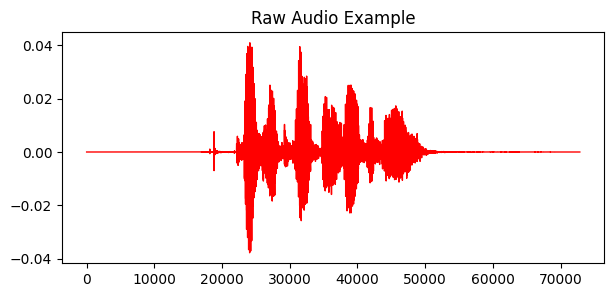

In [16]:
pd.Series(y).plot(figsize=(7,3),title='Raw Audio Example', lw=1,color='red')
plt.show()

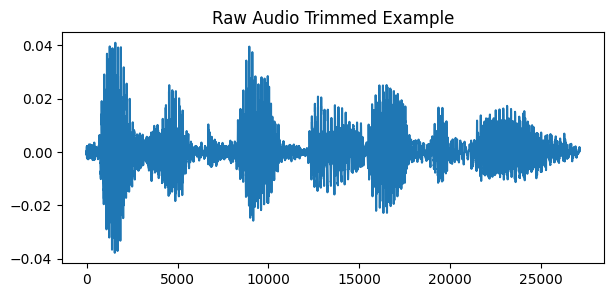

In [17]:
y_trimmed,_=librosa.effects.trim(y,top_db=20)
pd.Series(y_trimmed).plot(figsize=(7,3),title="Raw Audio Trimmed Example")
plt.show()

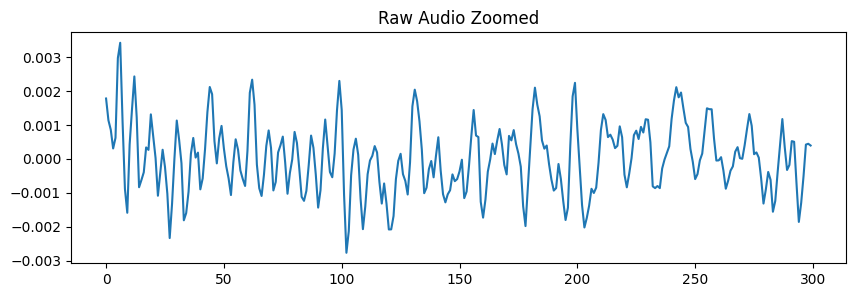

In [18]:
pd.Series(y[30000:30300]).plot(figsize=(10,3),title='Raw Audio Zoomed')
plt.show()

In [19]:
D=librosa.stft(y) #short time fourier transform
S_db=librosa.amplitude_to_db(np.abs(D),ref=np.max)
S_db.shape

(1025, 143)

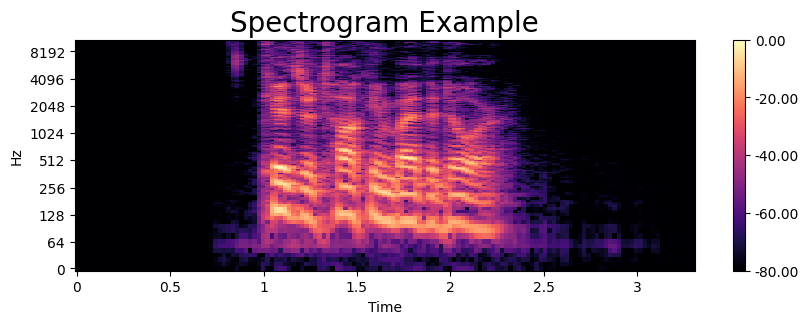

In [20]:
fig,ax=plt.subplots(figsize=(10,3))
img=librosa.display.specshow(S_db,x_axis='time',y_axis='log',ax=ax)
ax.set_title('Spectrogram Example',fontsize=20)
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()